In [506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from sklearn.metrics import r2_score, mean_squared_error

In [507]:
data = pd.read_csv(r"dataset\Expense_Categorization_Dataset.csv")

## Data Analysis

In [508]:
data.columns

Index(['transaction_id', 'timestamp', 'merchant_name', 'Unnamed: 3',
       'merchant_category', 'amount', 'payment_mode', 'is_recurring',
       'user_balance_pre', 'label_category', 'label_urgency'],
      dtype='object')

In [509]:
data.shape

(6000, 11)

In [510]:
data.head()

,transaction_id,timestamp,merchant_name,Unnamed: 3,merchant_category,amount,payment_mode,is_recurring,user_balance_pre,label_category,label_urgency
0,TXN0001,2026-01-12 03:29:00,UPI-PVR@PAYTM,NaN,Entertainment,48698,Debit Card,False,36548,Yellow,Discretionary
1,TXN0002,2026-01-25 19:41:00,VPA-Netflix@PAYTM,NaN,Subscriptions,44448,UPI,True,97580,Yellow,Discretionary
2,TXN0003,2026-01-10 22:48:00,Lakme Salon,NaN,Personal_Care,2052,Debit Card,False,12780,Yellow,Discretionary
3,TXN0004,2026-01-30 13:50:00,TATA POWER,NaN,Utilities,13131,Net Banking,True,94350,Red,Critical
4,TXN0005,2026-01-01 07:05:00,Ola,NaN,Commuting,38718,Debit Card,False,36963,Orange,Necessary


In [511]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     6000 non-null   object 
 1   timestamp          6000 non-null   object 
 2   merchant_name      6000 non-null   object 
 3   Unnamed: 3         0 non-null      float64
 4   merchant_category  6000 non-null   object 
 5   amount             6000 non-null   int64  
 6   payment_mode       6000 non-null   object 
 7   is_recurring       6000 non-null   bool   
 8   user_balance_pre   6000 non-null   int64  
 9   label_category     6000 non-null   object 
 10  label_urgency      6000 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 474.7+ KB


In [512]:
data.describe()

,Unnamed: 3,amount,user_balance_pre
count,0.0,6000.000000,6000.000000
mean,NaN,24988.834167,50703.949667
std,NaN,14387.135289,29112.422536
min,NaN,100.000000,507.000000
25%,NaN,12447.250000,25091.500000
50%,NaN,24974.500000,51051.000000
75%,NaN,37416.500000,76312.750000
max,NaN,49992.000000,99986.000000


In [513]:
data.duplicated().sum()

np.int64(0)

In [514]:
data = data.drop('transaction_id', axis=1)

In [515]:
data.columns

Index(['timestamp', 'merchant_name', 'Unnamed: 3', 'merchant_category',
       'amount', 'payment_mode', 'is_recurring', 'user_balance_pre',
       'label_category', 'label_urgency'],
      dtype='object')

In [516]:
data = data.drop('Unnamed: 3', axis=1)

In [517]:
data.head()

,timestamp,merchant_name,merchant_category,amount,payment_mode,is_recurring,user_balance_pre,label_category,label_urgency
0,2026-01-12 03:29:00,UPI-PVR@PAYTM,Entertainment,48698,Debit Card,False,36548,Yellow,Discretionary
1,2026-01-25 19:41:00,VPA-Netflix@PAYTM,Subscriptions,44448,UPI,True,97580,Yellow,Discretionary
2,2026-01-10 22:48:00,Lakme Salon,Personal_Care,2052,Debit Card,False,12780,Yellow,Discretionary
3,2026-01-30 13:50:00,TATA POWER,Utilities,13131,Net Banking,True,94350,Red,Critical
4,2026-01-01 07:05:00,Ola,Commuting,38718,Debit Card,False,36963,Orange,Necessary


In [518]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [519]:
unique_categories = data['merchant_category'].unique()
unique_categories

array(['Entertainment', 'Subscriptions', 'Personal_Care', 'Utilities',
       'Commuting', 'Healthcare', 'Fuel', 'Insurance', 'Dining', 'Travel',
       'Financial', 'Education', 'Miscellaneous', 'Groceries', 'Mortgage',
       'Shopping'], dtype=object)

## Data Visualization

### 1. Target Distribution

In [520]:
fig = px.histogram(data, x='label_category', color='label_category',
                   color_discrete_map={'Red':'red','Orange':'orange','Yellow':'yellow'},
                   title='Transaction Count per Label Category',
                   width=800, height=450)
fig.show()


### 2. Amount Distributio per Category

In [521]:
fig = px.box(data, x='label_category', y='amount', color='label_category',
             color_discrete_map={'Red':'red','Orange':'orange','Yellow':'yellow'},
             title='Transaction Amount Distribution per Category',
             width=800, height=450)
fig.show()


### 3. User Balance Distribution per Category

In [522]:
fig = px.box(data, x='label_category', y='user_balance_pre', color='label_category',
             color_discrete_map={'Red':'red','Orange':'orange','Yellow':'yellow'},
             title='User Balance Before Transaction per Category',
             width=800, height=450)
fig.show()

### 4. Transaction Trends Over Time

In [523]:
daily_counts = data.groupby(data['timestamp'].dt.date)['label_category'].count().reset_index()
daily_counts.columns = ['date','count']

fig = px.line(daily_counts, x='date', y='count', title='Transactions Per Day')
fig.show()


### 6. Correlation Heatmap

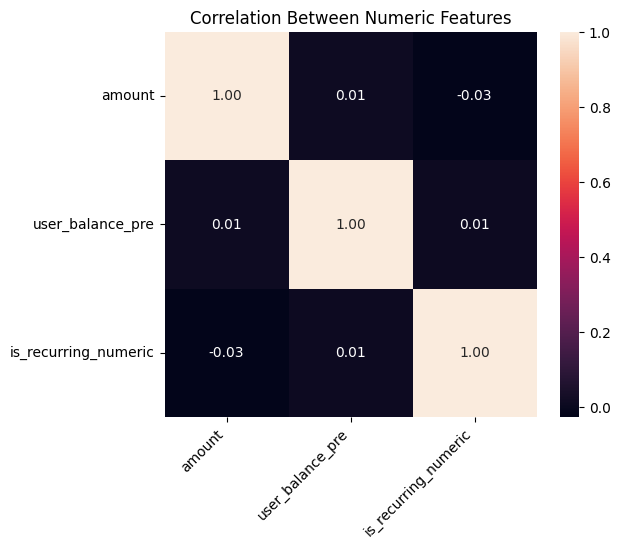

In [524]:
data['is_recurring_numeric'] = data['is_recurring'].astype(int)

# Select numeric columns for correlation
numeric_cols = ['amount', 'user_balance_pre', 'is_recurring_numeric']
corr = data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Correlation Between Numeric Features')
plt.show()

## Encoding

### 1. Time based encoding

In [525]:
data['hour'] = data['timestamp'].dt.hour
data.hour

0        3
1       19
2       22
3       13
4        7
        ..
5995     8
5996     4
5997     1
5998     6
5999    16
Name: hour, Length: 6000, dtype: int32

In [526]:
data['day_of_week'] = data['timestamp'].dt.dayofweek
data.day_of_week

0       0
1       6
2       5
3       4
4       3
       ..
5995    0
5996    1
5997    2
5998    1
5999    2
Name: day_of_week, Length: 6000, dtype: int32

### 2. Binary encoding

In [527]:
data['is_recurring'] = data['is_recurring'].astype(int)   # True 1, False 0
data.is_recurring

0       0
1       1
2       0
3       1
4       0
       ..
5995    0
5996    0
5997    0
5998    0
5999    0
Name: is_recurring, Length: 6000, dtype: int64

### 3. Ordinal encoding

In [528]:
category_map = {'Red': 2, 'Orange': 1, 'Yellow': 0}
data['label_category_enc'] = data['label_category'].map(category_map)

In [529]:
urgency_map = {'Critical': 2, 'Necessary': 1, 'Discretionary': 0}
data['label_urgency_enc'] = data['label_urgency'].map(urgency_map)

### 4. Label encoding

In [530]:
le_merchant = LabelEncoder()
data['merchant_name'] = le_merchant.fit_transform(data['merchant_name'])
joblib.dump(le_merchant, 'merchant_name_encoder.pkl')

['merchant_name_encoder.pkl']

In [531]:
le_category = LabelEncoder()
data['merchant_category'] = le_category.fit_transform(data['merchant_category'])
joblib.dump(le_category, 'merchant_category_encoder.pkl')

['merchant_category_encoder.pkl']

In [532]:
data.columns

Index(['timestamp', 'merchant_name', 'merchant_category', 'amount',
       'payment_mode', 'is_recurring', 'user_balance_pre', 'label_category',
       'label_urgency', 'is_recurring_numeric', 'hour', 'day_of_week',
       'label_category_enc', 'label_urgency_enc'],
      dtype='object')

In [533]:
data_final = data.drop(['timestamp', 'is_recurring_numeric',
                   'payment_mode', 'label_category', 'label_urgency'], axis=1)

data_final.to_csv('dataset/Encoded_Expense_Dataset.csv', index=False)

In [534]:
data_final.head()

,merchant_name,merchant_category,amount,is_recurring,user_balance_pre,hour,day_of_week,label_category_enc,label_urgency_enc
0,28,3,48698,0,36548,3,0,0,0
1,35,13,44448,1,97580,19,6,0,0
2,15,11,2052,0,12780,22,5,0,0
3,25,15,13131,1,94350,13,4,2,2
4,19,0,38718,0,36963,7,3,1,1


### Split input var and target var

In [535]:
x = data_final.drop(columns=['label_category_enc', 'label_urgency_enc'], axis=1)
y = data_final['label_category_enc']

In [536]:
x.head()

,merchant_name,merchant_category,amount,is_recurring,user_balance_pre,hour,day_of_week
0,28,3,48698,0,36548,3,0
1,35,13,44448,1,97580,19,6
2,15,11,2052,0,12780,22,5
3,25,15,13131,1,94350,13,4
4,19,0,38718,0,36963,7,3


In [537]:
print(x.shape) 
print(y.shape)

(6000, 7)
(6000,)


### Train-test split

In [538]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [539]:
model = RandomForestClassifier(
    n_estimators=200, 
    class_weight='balanced', 
    random_state=42
)

# Train the model
model.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [540]:
y_pred = model.predict(x_test)

#### Verify

In [541]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

R2 Score: 1.0
Mean Squared Error: 0.0


In [542]:
compare_df = pd.DataFrame({
    'Actual category': y_test,
    'Predicted category': y_pred
})

compare_df

,Actual category,Predicted category
1782,0,0
3917,2,2
221,1,1
2135,2,2
5224,2,2
...,...,...
2543,0,0
1773,2,2
2846,0,0
5799,0,0


In [543]:
fig = px.scatter(compare_df, x='Actual category', y='Predicted category',
                 title="Actual vs Predicted Disease",
                 width=600, height=450)
fig.show()


In [544]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       368
           2       1.00      1.00      1.00       307

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200


Confusion Matrix:
 [[525   0   0]
 [  0 368   0]
 [  0   0 307]]


In [545]:
joblib.dump(model, 'Expense_categorization.pkl')

['Expense_categorization.pkl']

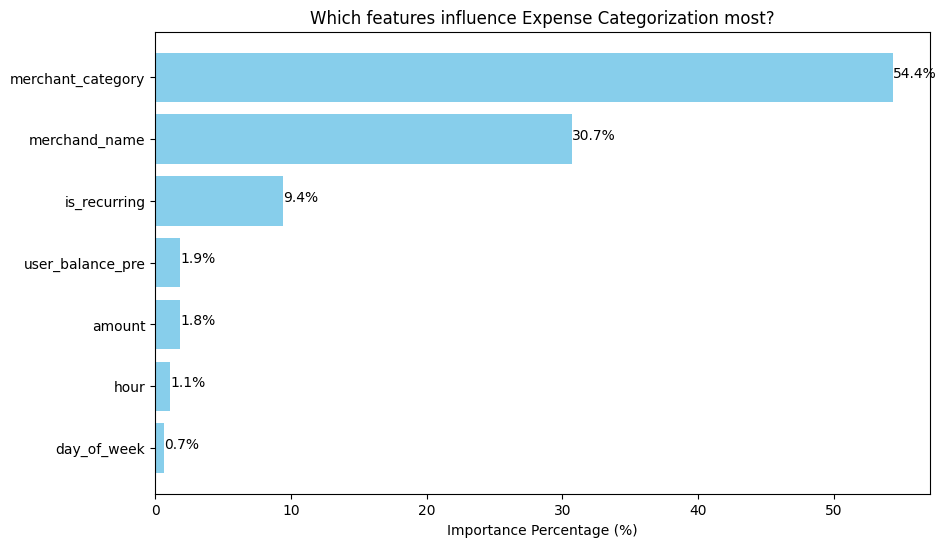

In [546]:
# 1. Get feature importance from your trained model
importances = model.feature_importances_
feature_names = ['merchand_name' ,'merchant_category', 'amount', 'is_recurring', 'user_balance_pre', 'hour', 'day_of_week']

# 2. Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance (%)': importances * 100
}).sort_values(by='Importance (%)', ascending=False)

# 3. Plot the graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance (%)'], color='skyblue')
plt.xlabel('Importance Percentage (%)')
plt.title('Which features influence Expense Categorization most?')
plt.gca().invert_yaxis()  # Highest importance at the top

# Display percentages on the bars
for index, value in enumerate(feature_importance_df['Importance (%)']):
    plt.text(value, index, f'{value:.1f}%')

plt.show()